In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Iris dataset
from sklearn.datasets import load_iris

In [36]:

# Load the Iris dataset from scikit-learn
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
# View the feature names
print("Feature names:", iris.feature_names)

# View the target names (class labels)
print("Target names:", iris.target_names)

# View the feature data (first 5 rows)
print("Feature data:")
print(iris.data[:5])

# View the target data (class labels, first 5 rows)
print("Target data:")
print(iris.target[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Feature data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target data:
[0 0 0 0 0]


In [38]:
# Create a DataFrame from the data and target
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = pd.DataFrame(data=iris.target, columns=['target'])
iris_dataset = pd.concat([data, target], axis=1)

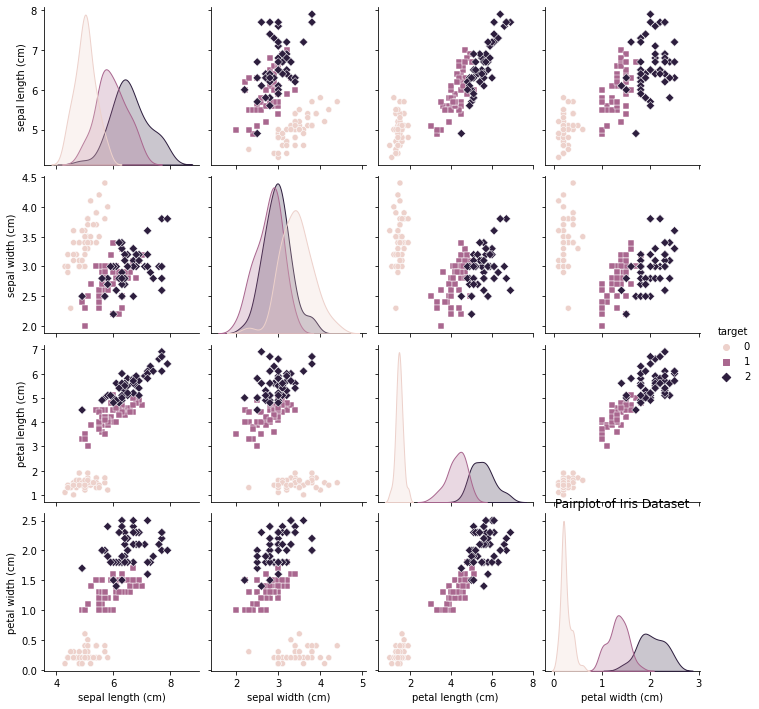

In [39]:
sns.pairplot(iris_dataset, hue='target', markers=["o", "s", "D"])
plt.title("Pairplot of Iris Dataset")
plt.show()

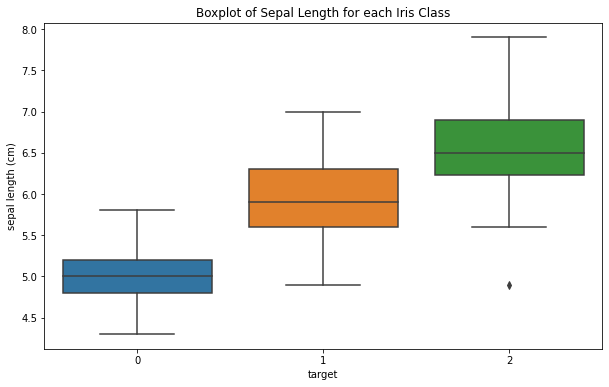

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sepal length (cm)', data=iris_dataset)
plt.title("Boxplot of Sepal Length for each Iris Class")
plt.show()

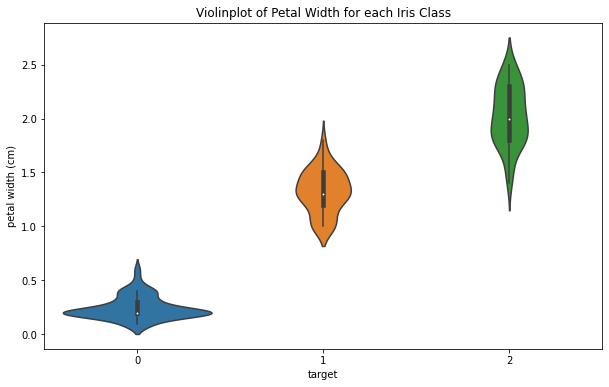

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='petal width (cm)', data=iris_dataset)
plt.title("Violinplot of Petal Width for each Iris Class")
plt.show()

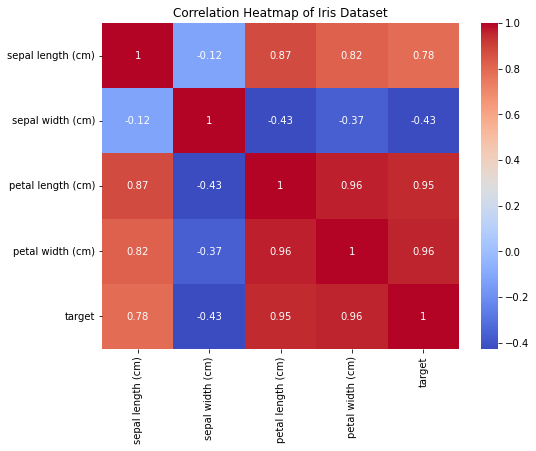

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

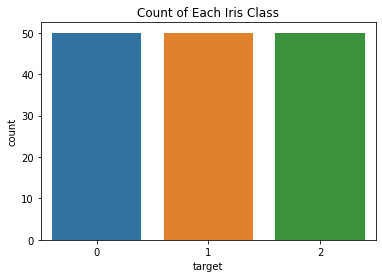

In [43]:
sns.countplot(x='target', data=iris_dataset)
plt.title("Count of Each Iris Class")
plt.show()

In [44]:
# Split data into features and target
X = data.values
y = target.values

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# List of supervised learning models
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    MLPClassifier(),
    KNeighborsClassifier()
]

In [48]:
# Create a dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Classification Report': []}

In [49]:
# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
     # Store results in the dictionary
results['Model'].append(model_name)
results['Accuracy'].append(accuracy)
results['Classification Report'].append(classification_rep)

print(f"{model_name} Accuracy: {accuracy:.2f}")
print(classification_rep)
print()

Training and evaluating LogisticRegression...
Training and evaluating SVC...


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and evaluating RandomForestClassifier...


C:\Users\HP COMPUTER.S\AppData\Local\Temp\ipykernel_12832\563532154.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training and evaluating MLPClassifier...


d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and evaluating KNeighborsClassifier...
KNeighborsClassifier Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [50]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('model_results.xlsx', index=False)

# Display the results
print("\nResults saved to 'model_results.xlsx'")
print(results_df)


Results saved to 'model_results.xlsx'
                  Model  Accuracy  \
0  KNeighborsClassifier       1.0   

                               Classification Report  
0                precision    recall  f1-score   ...  
